Extrapolation with n=1: 0.03561864740171816, Error: 0.03561864740171816
Extrapolation with n=2: -0.006497351706207577, Error: 0.006497351706207577
Extrapolation with n=3: 0.00014222651023831911, Error: 0.00014222651023831911
Extrapolation with n=4: -5.2589457514296e-06, Error: 5.2589457514296e-06
Extrapolation with n=5: 2.9676363810793305e-08, Error: 2.9676363810793305e-08
Extrapolation with n=6: -2.6212987336293736e-10, Error: 2.6212987336293736e-10
Extrapolation with n=7: 3.5627056860221273e-13, Error: 3.5627056860221273e-13
Extrapolation with n=8: -7.771561172376096e-15, Error: 7.771561172376096e-15
Extrapolation with n=9: -4.463096558993129e-14, Error: 4.463096558993129e-14
Extrapolation with n=10: -7.405187574249794e-14, Error: 7.405187574249794e-14


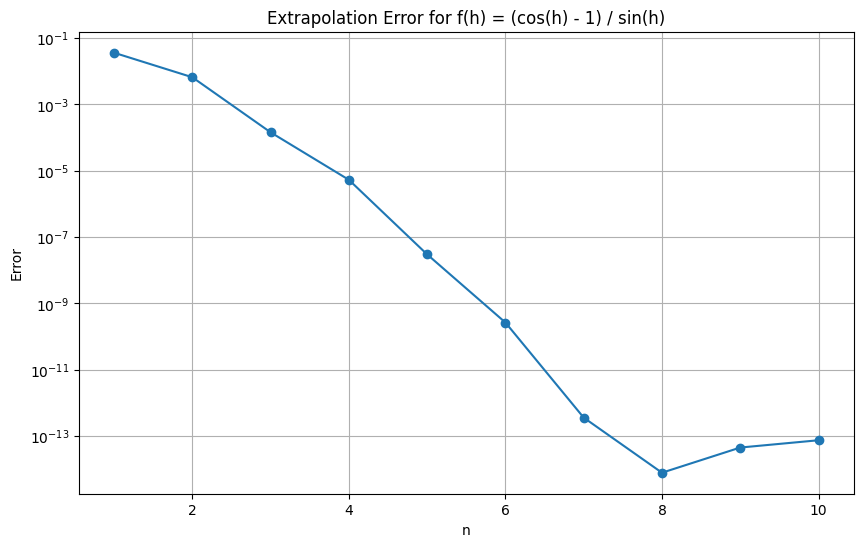

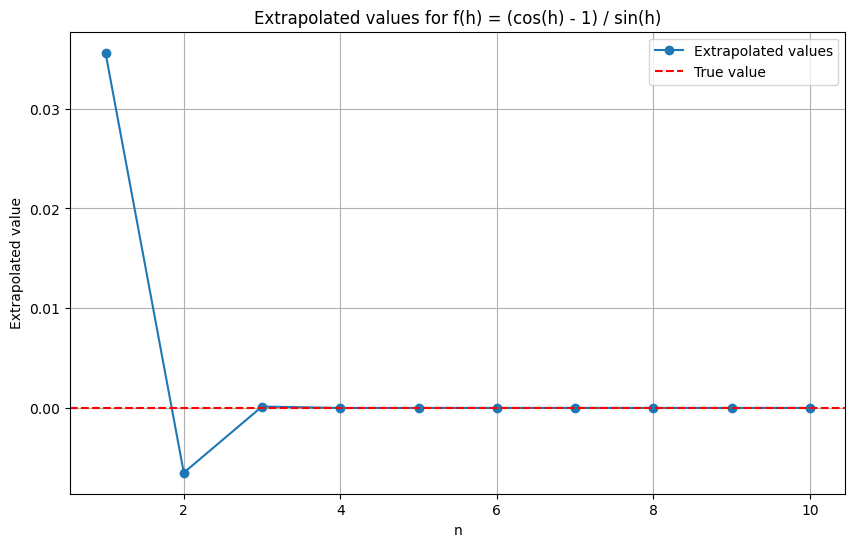

Extrapolation with n=1: 1.0762311696089155, Error: 0.07623116960891552
Extrapolation with n=2: 1.0017637392340648, Error: 0.0017637392340648095
Extrapolation with n=3: 0.999877176968249, Error: 0.00012282303175104037
Extrapolation with n=4: 0.9999996322686664, Error: 3.6773133360590293e-07
Extrapolation with n=5: 1.0000000058384388, Error: 5.838438843497329e-09
Extrapolation with n=6: 1.0000000000025717, Error: 2.5717206142417126e-12
Extrapolation with n=7: 0.9999999999999902, Error: 9.769962616701378e-15
Extrapolation with n=8: 0.9999999999999998, Error: 2.220446049250313e-16
Extrapolation with n=9: 1.0, Error: 0.0
Extrapolation with n=10: 1.0, Error: 0.0


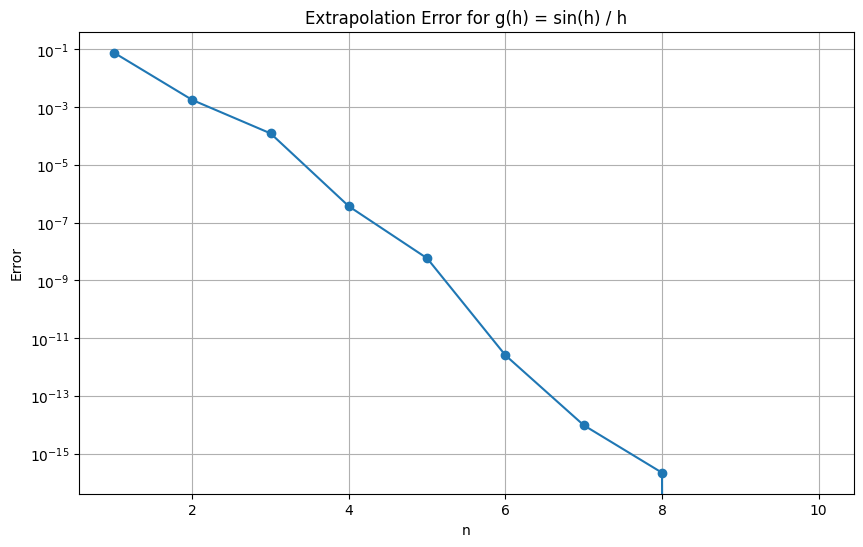

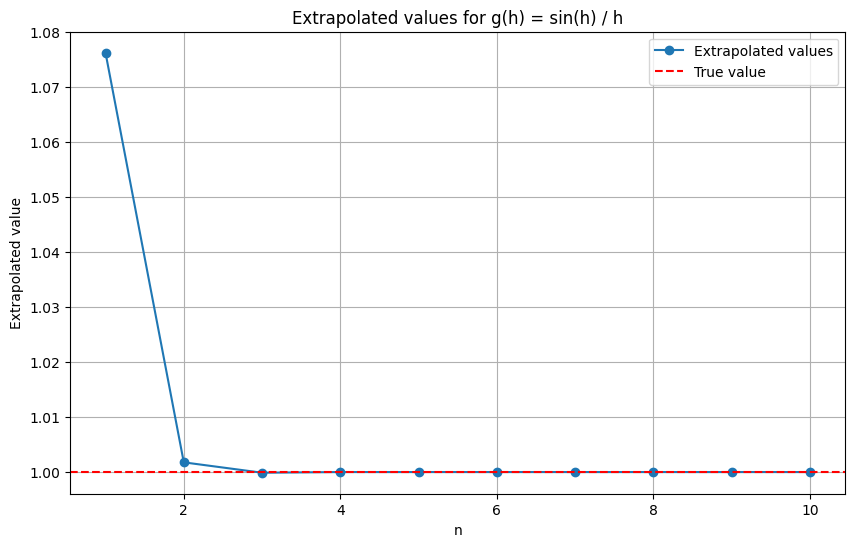

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton_coeff(t, y):
    n = len(t)
    a = np.copy(y)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i] = (a[i] - a[i-1]) / (t[i] - t[i-j])
    return a

def newton_value(t, a, x):
    n = len(a)
    p = a[-1]
    for k in range(n-2, -1, -1):
        p = p * (x - t[k]) + a[k]
    return p

def extrapolate(a, h0, k, n):
    h_values = [h0 / 2**j for j in range(k, k + n + 1)]
    a_values = [a(h) for h in h_values]
    
    # Perform Newton interpolation
    coeffs = newton_coeff(h_values, a_values)
    extrapolated_value = newton_value(h_values, coeffs, 0)
    
    return extrapolated_value

def plot_extrapolation(func, h0, k, n, name, true_value):
    errors = []
    extrapolated_values = []
    for i in range(1, n+1):
        extrapolated_value = extrapolate(func, h0, k, i)
        extrapolated_values.append(extrapolated_value)
        error = abs(extrapolated_value - true_value)
        errors.append(error)
        print(f"Extrapolation with n={i}: {extrapolated_value}, Error: {error}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), errors, marker='o')
    plt.yscale('log')
    plt.xlabel('n')
    plt.ylabel('Error')
    plt.title(f'Extrapolation Error for {name}')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), extrapolated_values, marker='o', label='Extrapolated values')
    plt.axhline(y=true_value, color='r', linestyle='--', label='True value')
    plt.xlabel('n')
    plt.ylabel('Extrapolated value')
    plt.title(f'Extrapolated values for {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Funktionen
f = lambda h: (np.cos(h) - 1) / np.sin(h)
g = lambda h: np.sin(h) / h

# Parameter
h0 = 1.0
k = 0
n = 10

# True values
true_f_value = 0.0  # lim h->0 (cos(h) - 1) / sin(h) = 0
true_g_value = 1.0  # lim h->0 sin(h) / h = 1

# Extrapolation und Darstellung
plot_extrapolation(f, h0, k, n, "f(h) = (cos(h) - 1) / sin(h)", true_f_value)
plot_extrapolation(g, h0, k, n, "g(h) = sin(h) / h", true_g_value)
